In [143]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [142]:
brdf=pd.read_csv("/content/amazon.csv",encoding="iso-8859-1")
brdf

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [145]:
brdf.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

# 1. top 5 rows:

In [146]:
brdf.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. last 5 rows

In [147]:
brdf.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [148]:
brdf.shape

(6454, 5)

In [149]:
print("no. of rows =",brdf.shape[0])

no. of rows = 6454


In [150]:
print("no. of columns =",brdf.shape[1])

no. of columns = 5


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [151]:
brdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


# 5. Check For Duplicate Data and Drop Them

In [152]:
brdf.duplicated().any()

True

In [153]:
brdf=brdf.drop_duplicates()

In [154]:
brdf

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [155]:
print("no. of duplicates data =",6454-6422)

no. of duplicates data = 32


# 6. Check Null Values In The Dataset

In [156]:
brdf.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get Overall Statistics About The Dataframe

In [157]:
brdf.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


# 8. Rename Month Names To English

In [158]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [159]:
brdf["month"].dtypes

dtype('O')

In [162]:
brdf["month"].value_counts()

Agosto       540
Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Janeiro      535
Fevereiro    535
Março        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

In [205]:
brdf["eng_month"]=brdf["month"].map({
'Janeiro':'Jan',
'Fevereiro':'Feb',
'Março':'Mar',
'Abril':'Apr',
'Maio':'May',
'Junho':'Jun',
'Julho':'Jul',
'Agosto':'Aug',
'Setembro':'Sep',
'Outubro':'Oct',
'Novembro':'Nov',
'Dezembro':'Dec'
})

<ipython-input-205-1cc4653921ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdf["eng_month"]=brdf["month"].map({


In [206]:
brdf

,year,state,month,number,date,eng_month,day
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan,Thursday
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan,Friday
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan,Saturday
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan,Monday
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan,Tuesday
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec,Sunday
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec,Tuesday
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec,Wednesday
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec,Thursday


# 9. Total Number of Fires Registered

In [207]:
brdf.shape
print("no. of forest fire reported = ",brdf.shape[0])

no. of forest fire reported =  6422


# 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [165]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month'], dtype='object')

In [208]:
brdf2=brdf.groupby("eng_month")["number"].sum().reset_index()
brdf2

,eng_month,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


<Axes: xlabel='eng_month', ylabel='number'>

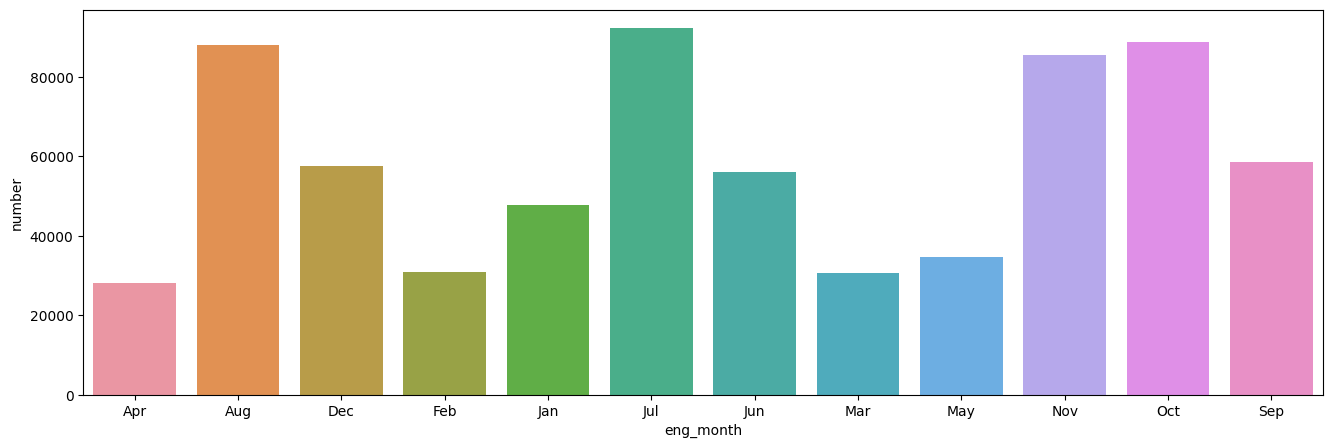

In [209]:
plt.figure(figsize=(16,5))
sn.barplot(x="eng_month",y="number",data=brdf2)



# 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [168]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month'], dtype='object')

In [210]:
brdf["year"].dtypes

dtype('int64')

In [211]:
brdf3=brdf.groupby("year")["number"].sum().reset_index()
brdf3

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

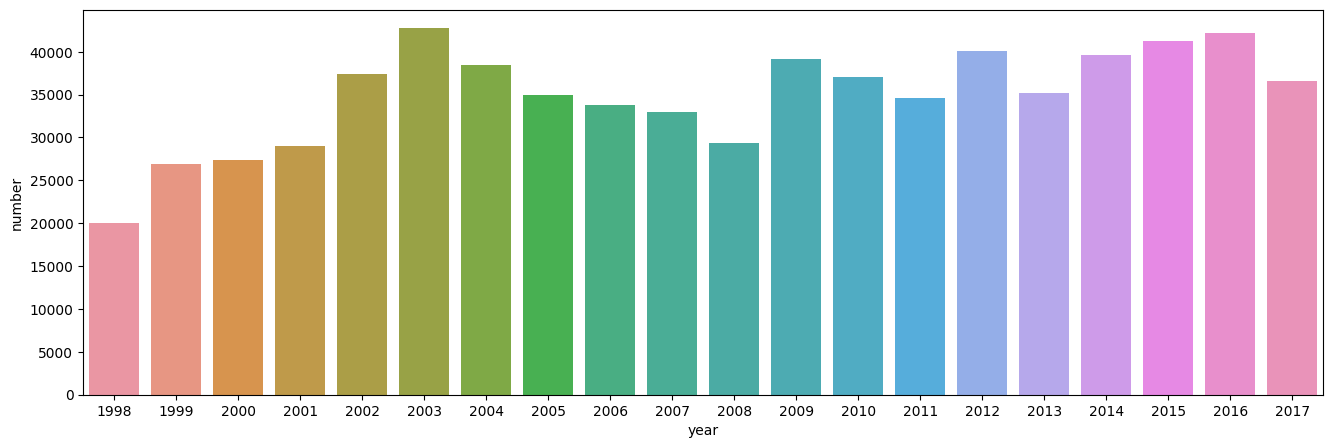

In [212]:
plt.figure(figsize=(16,5))
sn.barplot(x="year",y="number",data=brdf3)

# 12. In Which State Maximum Number of Forest Fires Was Reported?

In [213]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month', 'day'], dtype='object')

In [173]:
brdf4=brdf.groupby("state")["number"].sum().reset_index()
brdf4

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


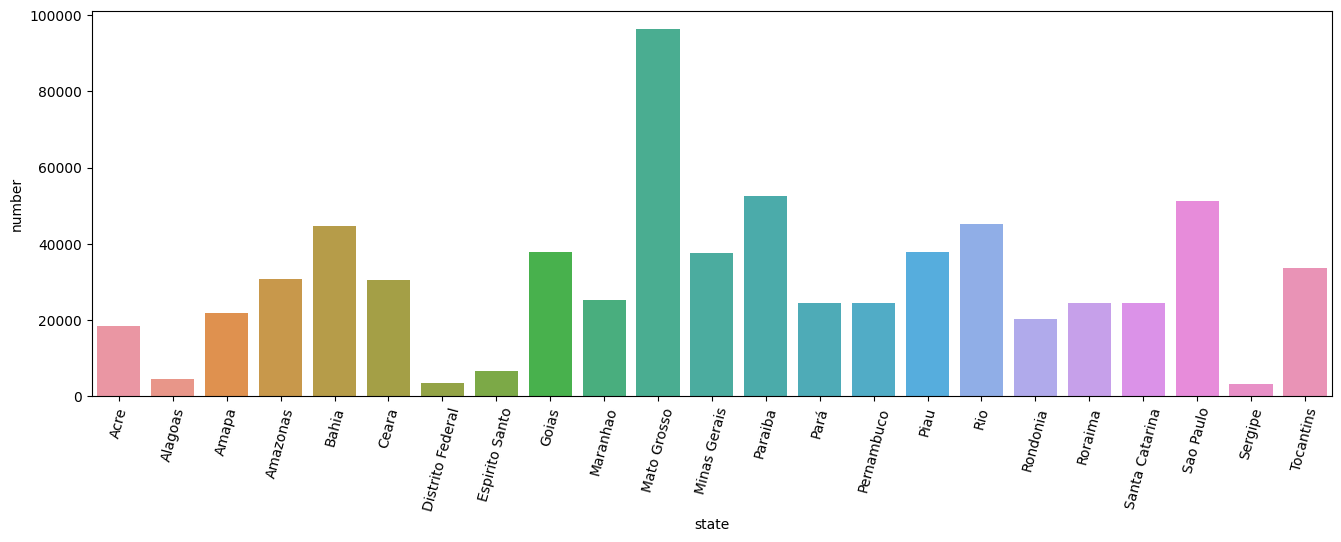

In [214]:
plt.figure(figsize=(16,5))
sn.barplot(x="state",y="number",data=brdf4)
plt.xticks(rotation=75)
plt.show()

# 13. Find Total Number of Fires Were Reported In Amazonas

In [215]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month', 'day'], dtype='object')

In [216]:
brdf[brdf['state']=="Amazonas"]["number"].sum()


30650.129

# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [217]:
brdf5=brdf[brdf["state"]=="Amazonas"]
brdf5

,year,state,month,number,date,eng_month,day
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan,Thursday
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan,Friday
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan,Saturday
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan,Monday
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan,Tuesday
...,...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec,Sunday
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec,Tuesday
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec,Wednesday
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec,Thursday


In [218]:
brdf6=brdf5.groupby("year")["number"].sum().reset_index()
brdf6

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

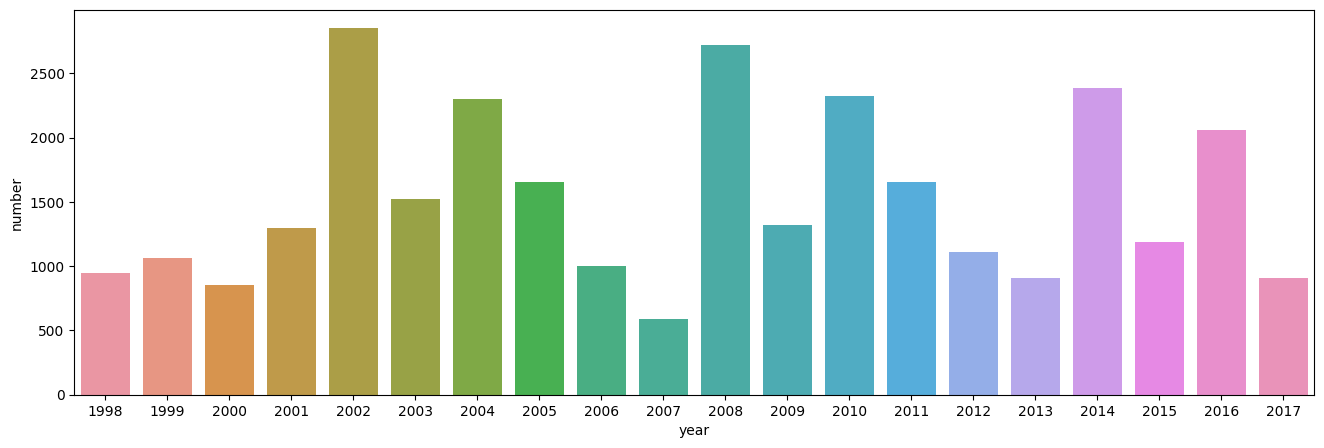

In [219]:
plt.figure(figsize=(16,5))
sn.barplot(x="year",y="number",data=brdf6)

# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [181]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month'], dtype='object')

In [192]:
amazondf=brdf[brdf["state"]=="Amazonas"]
amazondf

,year,state,month,number,date,eng_month,day
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan,Thursday
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan,Friday
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan,Saturday
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan,Monday
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan,Tuesday
...,...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec,Sunday
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec,Tuesday
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec,Wednesday
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec,Thursday


In [193]:
brdf["date"].dtypes

dtype('<M8[ns]')

In [194]:
brdf["date"]=pd.to_datetime(brdf['date'])

<ipython-input-194-44a0df1ca883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdf["date"]=pd.to_datetime(brdf['date'])


In [195]:
brdf["day"]=brdf["date"].dt.day_name()
brdf["day"].reset_index()
#brdf.groupby("day")["number"].sum().plot(kind="bar")

<ipython-input-195-beb55a790972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brdf["day"]=brdf["date"].dt.day_name()


,index,day
0,0,Thursday
1,1,Friday
2,2,Saturday
3,3,Monday
4,4,Tuesday
...,...,...
6417,6449,Sunday
6418,6450,Tuesday
6419,6451,Wednesday
6420,6452,Thursday


In [196]:
brdf

,year,state,month,number,date,eng_month,day
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan,Thursday
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan,Friday
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan,Saturday
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan,Monday
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan,Tuesday
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec,Sunday
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec,Tuesday
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec,Wednesday
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec,Thursday


In [197]:
brdf8=amazondf.groupby("day")["number"].sum().reset_index()
brdf8

,day,number
0,Friday,5446.480
1,Monday,1886.601
2,Saturday,4162.666
3,Sunday,3015.186
4,Thursday,5754.802
5,Tuesday,6474.217
6,Wednesday,3910.177


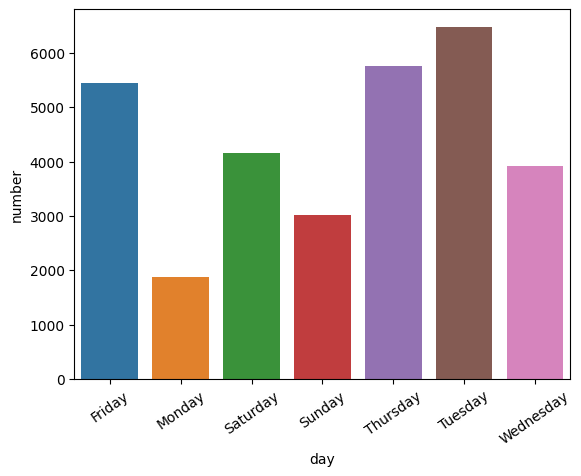

In [198]:
sn.barplot(x="day",y="number",data=brdf8)
plt.xticks(rotation=35)
plt.show()

# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [199]:
brdf.dtypes

year                  int64
state                object
month                object
number              float64
date         datetime64[ns]
eng_month            object
day                  object
dtype: object

In [203]:
df15=brdf[brdf['year']==2015]
df15

,year,state,month,number,date,eng_month,day
17,2015,Acre,Janeiro,1.000,2015-01-01,Jan,Thursday
37,2015,Acre,Fevereiro,2.000,2015-01-01,Feb,Thursday
57,2015,Acre,Março,2.000,2015-01-01,Mar,Thursday
77,2015,Acre,Abril,3.000,2015-01-01,Apr,Thursday
97,2015,Acre,Maio,2.000,2015-01-01,May,Thursday
...,...,...,...,...,...,...,...
6372,2015,Tocantins,Agosto,2.540,2015-01-01,Aug,Thursday
6392,2015,Tocantins,Setembro,5.510,2015-01-01,Sep,Thursday
6412,2015,Tocantins,Outubro,4.844,2015-01-01,Oct,Thursday
6432,2015,Tocantins,Novembro,833.000,2015-01-01,Nov,Thursday


In [223]:
month_df=df15.groupby("eng_month")["number"].sum().reset_index()
month_df

,eng_month,number
0,Apr,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,Jul,4364.392
6,Jun,3260.552
7,Mar,2202.000
8,May,2384.000
9,Nov,4034.518


<Axes: xlabel='eng_month', ylabel='number'>

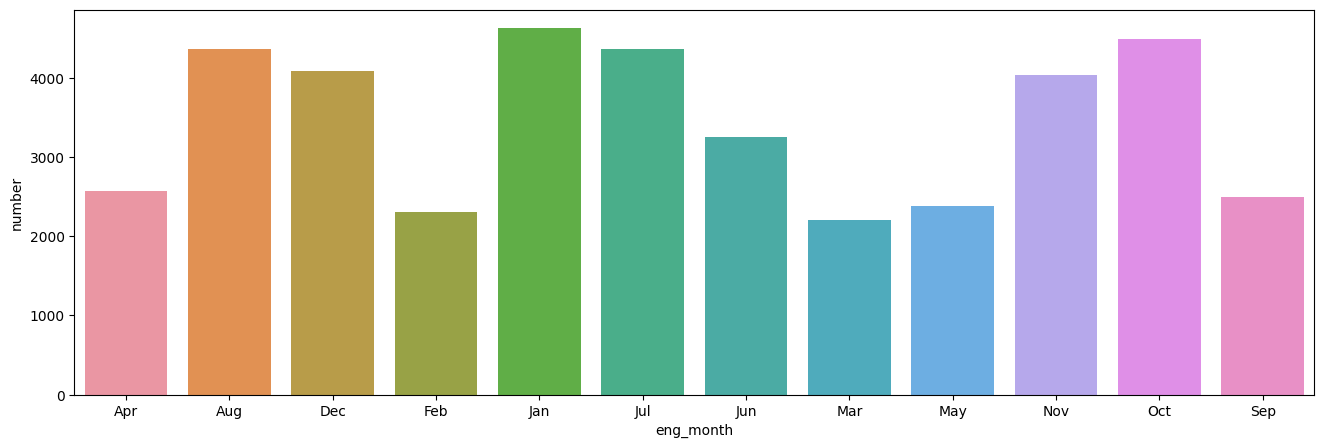

In [225]:
plt.figure(figsize=(16,5))
sn.barplot(x="eng_month",y="number",data=month_df)

# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [229]:
statedf=brdf.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()
statedf

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


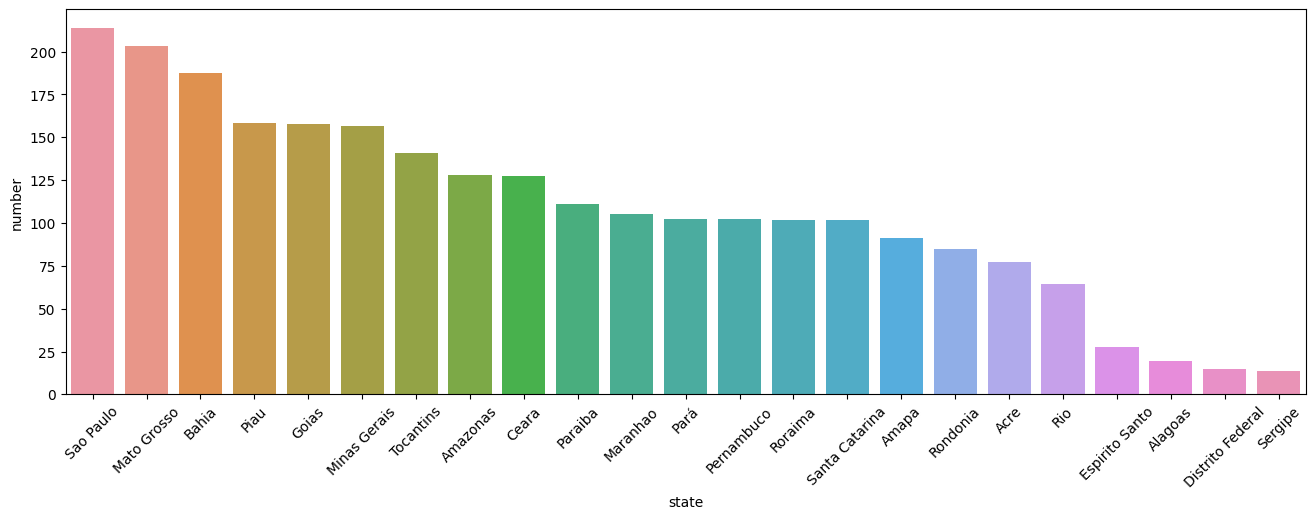

In [232]:
plt.figure(figsize=(16,5))
sn.barplot(x="state",y="number",data=statedf)
plt.xticks(rotation=45)
plt.show()

# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [235]:
brdf.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month', 'day'], dtype='object')

In [236]:
brdf['eng_month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
6449    Dec
6450    Dec
6451    Dec
6452    Dec
6453    Dec
Name: eng_month, Length: 6422, dtype: object

In [242]:
brdf[brdf['eng_month']=="Dec"]["state"].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)